
# Análisis de la probabilidad de Obesidad en España

Este notebook tiene como objetivo analizar la probabilidad de padecer obesidad en España, así como la probabilidad de que una persona obesa resida en una provincia específica. Además, se construirá un árbol de decisión básico basado en este análisis.

## Contexto

Se cuenta con datos sobre el total de personas diagnosticadas con obesidad en España y el total de población detallado a nivel de provincia. Los datos se encuentran en el archivo `datos_obesidad.xlsx`.

## Preguntas a responder

1. ¿Cuál es la probabilidad de padecer obesidad en España?
2. Si seleccionamos una de las personas obesas al azar, ¿cuál es la probabilidad de que resida en Barcelona? ¿Y en el resto de provincias?
3. Construir un árbol de decisión.

## Datos

Los datos de obesidad están basados en diferentes fuentes, como la Encuesta Nacional de Salud (ENSANUT) y el Estudio Sobre Nutrición, Actividad Física y Salud (ENAS). Los datos de población son estimaciones del INE a fecha de 1 de enero de 2023.


In [2]:
import pandas as pd # manipulación de datos
import openpyxl # leer excel
# Cargar los datos
obesidad = pd.read_excel('datos_obesidad.xlsx')

# Mostrar los primeros datos
obesidad.head()


,Fecha,Provincia,Total Obesos,Total Habitantes
0,2023-01-01,Alava,42345,323897
1,2023-01-01,Albacete,146234,398567
2,2023-01-01,Alicante,368423,1949789
3,2023-01-01,Almería,240567,702345
4,2023-01-01,Asturias,278234,1019897



## 1. Cálculo de la probabilidad de padecer obesidad en España

Para calcular esta probabilidad, sumamos el número total de personas obesas y el número total de habitantes en todas las provincias, y luego dividimos el total de obesos entre el total de habitantes.

### Fórmula
$$ P(A) = \frac{\text{Casos Favorables}}{\text{Casos Totales}} = \frac{\text{Total de personas obesas en España}}{\text{Total de habitantes en España}} $$




In [2]:
# Calcular el total de obesos y el total de habitantes en España
total_obesos_espana = obesidad['Total Obesos'].sum()
total_habitantes_espana = obesidad['Total Habitantes'].sum()

In [3]:
total_obesos_espana

9156732

In [4]:
total_habitantes_espana

47942464

In [5]:
# Calcular la probabilidad de padecer obesidad en España
probabilidad_obesidad_espana = total_obesos_espana / total_habitantes_espana
probabilidad_obesidad_espana

0.19099418836712273

### Sustitución
$$
P(A) = \frac{9,156,732}{47,942,464} = 0.19099418836712273
$$

**Comentario:** Calculamos la probabilidad de que una persona en España sea obesa dividiendo el total de personas obesas por el total de habitantes. Imprimimos los resultados para revisar los valores calculados.

**Interpretación de resultados:**

* Total de personas obesas en España: 9,156,732
* Total de habitantes en España: 47,942,464
* **Probabilidad de padecer obesidad en España:** 19.1%


## 2. Probabilidad de que una persona obesa resida en Barcelona

Vamos a calcular la probabilidad de que una persona obesa seleccionada al azar resida en Barcelona.

### Fórmula
$$  P(B|A) = \frac{P(A \cap B)}{P(A)}
 = \frac{\text{Total de obesos en Barcelona}}{\text{Total de obesos en España}}  $$

**P(B∣A):** "Dado que sé que una persona es obesa, ¿cuál es la probabilidad de que viva en Barcelona?"

In [6]:
# Filtrar los datos para obtener los valores específicos de Barcelona
barcelona_data = obesidad[obesidad['Provincia'] == 'Barcelona']
barcelona_data

,Fecha,Provincia,Total Obesos,Total Habitantes
8,2023-01-01,Barcelona,712897,5539567


In [7]:
# Total de obesos en Barcelona
total_obesos_barcelona = barcelona_data['Total Obesos'].sum()
total_obesos_barcelona

712897

In [8]:
# Calcular la probabilidad de que una persona obesa resida en Barcelona
probabilidad_obeso_barcelona = total_obesos_barcelona / total_obesos_espana
probabilidad_obeso_barcelona

0.0778549596078601

### Sustitución
$$
P(B|A) = \frac{712,897}{9,156,732} = 0.0778549596078601
$$

**Comentario:** Filtramos los datos para obtener los valores específicos de Barcelona y calculamos la probabilidad de que una persona obesa resida en Barcelona.

**Interpretación de resultados:**

* Total de personas obesas en Barcelona: 712,897
* **Probabilidad de que una persona obesa resida en Barcelona:** 7.8%

## 2.1 Probabilidad de que una persona obesa resida en una provincia que no sea Barcelona

Esta probabilidad se calcula como el complemento de la probabilidad de que resida en Barcelona:

### Fórmula
$$
P(\bar{B}|A) = 1 - P(B|A)
$$

### Sustitución
$$
P(\bar{B}|A) = 1 - 0.0779 = 0.9221
$$

Por lo tanto, la **probabilidad de que una persona obesa no resida en Barcelona es de aproximadamente 92.21%**.

## 3. Arbol de Desición

### Cálculo de $$ P(\bar{A})  \quad , \quad P(\bar{B}|\bar{A}) \quad y \quad P(B|\bar{A}) \quad $$

Para completar el árbol de decisión, calculamos las siguientes probabilidades:


1. **Probabilidad de no ser obeso:** 
$$
P(\bar{A}) = 1 - P({A})
$$

2. **Probabilidad de residir en Barcelona dado que no se es obeso:** 
$$
P(B|\bar{A}) = \frac{\text{Total de personas no obesas en Barcelona}}{\text{Total de personas no obesas en España}}
$$

3. **Probabilidad de no residir en Barcelona dado que no se es obeso:**:
$$
P(\bar{B}|\bar{A}) = 1 - P(B|\bar{A})
$$ 



In [9]:
# Calcular el total de no obesos en España
total_no_obesos_espana = total_habitantes_espana - total_obesos_espana
total_no_obesos_espana

38785732

In [11]:
# Calcular el total de no obesos en Barcelona
total_habitantes_barcelona=barcelona_data['Total Habitantes']
total_no_obesos_barcelona = total_habitantes_barcelona - total_obesos_barcelona
total_no_obesos_barcelona

8    4826670
Name: Total Habitantes, dtype: int64

In [12]:
# Calcular la probabilidad de residir en Barcelona dado que no se es obeso
probabilidad_no_obeso_barcelona = total_no_obesos_barcelona / total_no_obesos_espana
probabilidad_no_obeso_barcelona

8    0.124444
Name: Total Habitantes, dtype: float64

In [13]:
# Calcular la probabilidad de no residir en Barcelona dado que no se es obeso
probabilidad_no_residir_barcelona = 1 - probabilidad_no_obeso_barcelona
probabilidad_no_residir_barcelona

8    0.875556
Name: Total Habitantes, dtype: float64

In [14]:
# Calcular la probabilidad de no ser obeso
probabilidad_no_ser_obeso = 1 - probabilidad_obesidad_espana
probabilidad_no_ser_obeso

0.8090058116328773

### Sustitución
$$
P(B|\bar{A}) = \frac{4,826,670}{38,785,732} = 0.1244443256337964
$$
$$
P(\bar{B}|\bar{A}) = 1 - 0.1244443256337964 = 0.8755556743662036
$$

$$
P(\bar{A}) = 1 - 0.19099418836712273 = 0.8090058116328773
$$

**Interpretación de resultados:**

* **Probabilidad de residir en Barcelona dado que no se es obeso:** 12.4%
* **Probabilidad de no residir en Barcelona dado que no se es obeso:** 87.6%
* **Probabilidad de no ser obeso:** 80.9%

C:\Users\Edison\AppData\Local\Temp\ipykernel_12648\1494070249.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ('No Obeso (Ā)', 'Reside en Barcelona (B|Ā)'): f"P(B|Ā) = {float(probabilidad_no_obeso_barcelona):.2f}",
C:\Users\Edison\AppData\Local\Temp\ipykernel_12648\1494070249.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ('No Obeso (Ā)', 'No Reside en Barcelona (B̄|Ā)'): f"P(B̄|Ā) = {float(probabilidad_no_residir_barcelona):.2f}"


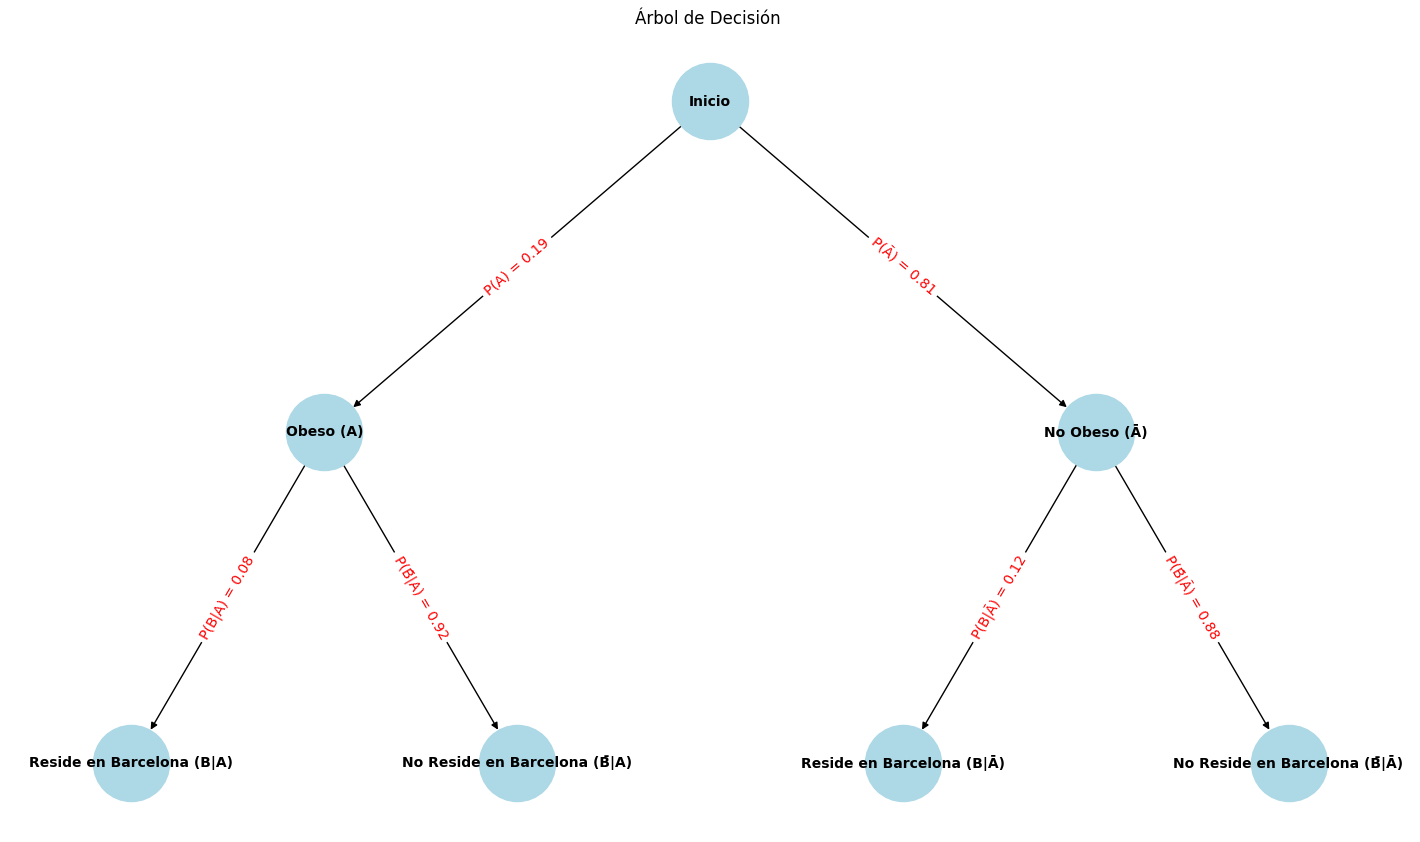

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el gráfico del árbol de decisión
def plot_decision_tree_alternative():
    # Crear un grafo
    G = nx.DiGraph()

    # Añadir nodos y aristas con sus respectivas probabilidades
    G.add_edges_from([
        ('Inicio', 'Obeso (A)'), 
        ('Inicio', 'No Obeso (Ā)'),
        ('Obeso (A)', 'Reside en Barcelona (B|A)'),
        ('Obeso (A)', 'No Reside en Barcelona (B̄|A)'),
        ('No Obeso (Ā)', 'Reside en Barcelona (B|Ā)'),
        ('No Obeso (Ā)', 'No Reside en Barcelona (B̄|Ā)')
    ])

    # Posiciones de los nodos
    pos = {
        'Inicio': (0, 0),
        'Obeso (A)': (-1, -1),
        'No Obeso (Ā)': (1, -1),
        'Reside en Barcelona (B|A)': (-1.5, -2),
        'No Reside en Barcelona (B̄|A)': (-0.5, -2),
        'Reside en Barcelona (B|Ā)': (0.5, -2),
        'No Reside en Barcelona (B̄|Ā)': (1.5, -2)
    }

    # Etiquetas de las aristas
    labels = {
        ('Inicio', 'Obeso (A)'): f"P(A) = {probabilidad_obesidad_espana:.2f}",
        ('Inicio', 'No Obeso (Ā)'): f"P(Ā) = {probabilidad_no_ser_obeso:.2f}",
        ('Obeso (A)', 'Reside en Barcelona (B|A)'): f"P(B|A) = {probabilidad_obeso_barcelona:.2f}",
        ('Obeso (A)', 'No Reside en Barcelona (B̄|A)'): f"P(B̄|A) = {1 - probabilidad_obeso_barcelona:.2f}",
        ('No Obeso (Ā)', 'Reside en Barcelona (B|Ā)'): f"P(B|Ā) = {float(probabilidad_no_obeso_barcelona):.2f}",
        ('No Obeso (Ā)', 'No Reside en Barcelona (B̄|Ā)'): f"P(B̄|Ā) = {float(probabilidad_no_residir_barcelona):.2f}"
    }

    # Dibujar el grafo
    plt.figure(figsize=(14, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title('Árbol de Decisión ')
    plt.show()

plot_decision_tree_alternative()



## Explicación del Árbol de Decisión

El árbol de decisión muestra las diferentes probabilidades condicionales y conjuntas relacionadas con la obesidad y la residencia en Barcelona. Las probabilidades están organizadas de manera que podemos seguir cada rama para entender las relaciones entre ser obeso y residir en Barcelona.

- **Probabilidad de ser obeso:** $$ P(A)=19.1% $$
- **Probabilidad de no ser obeso:**  $$P(\bar{A}) = 80.9%$$
- **Probabilidad de residir en Barcelona dado que se es obeso:** $$ P(B|A) = 7.8%$$
- **Probabilidad de no residir en Barcelona dado que se es obeso:**  $$P(\bar{B}|A) = 92.2%$$
- **Probabilidad de residir en Barcelona dado que no se es obeso:** $$ P(B|\bar{A}) = 12.4%$$
- **Probabilidad de no residir en Barcelona dado que no se es obeso:** $$ P(\bar{B}|\bar{A}) = 87.6%$$
